In [ ]:
pip list

Package                   Version
------------------------- -----------
anyio                     4.2.0
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
asttokens                 2.0.5
async-lru                 2.0.4
attrs                     24.2.0
Babel                     2.11.0
backcall                  0.2.0
beautifulsoup4            4.12.3
bleach                    4.1.0
Brotli                    1.0.9
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.3.2
click                     8.1.7
comm                      0.2.1
cvzone                    1.6.1
debugpy                   1.6.7
decorator                 5.1.1
defusedxml                0.7.1
dlib                      19.24.0
exceptiongroup            1.2.0
executing                 0.8.3
face-recognition          1.3.0
face-recognition-models   0.3.0
fastjsonschema            2.16.2
h11                       0.14.0
httpcore                  1.0.2
httpx             

In [ ]:
import cv2 as cv
imagePath = 'input_img.jpeg'

In [3]:
img = cv.imread(imagePath)

In [4]:
img.shape

(1080, 810, 3)

In [6]:
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [7]:
img

array([[[153, 168, 184],
        [153, 168, 184],
        [153, 168, 184],
        ...,
        [144, 159, 175],
        [145, 160, 176],
        [145, 160, 176]],

       [[153, 168, 184],
        [153, 168, 184],
        [153, 168, 184],
        ...,
        [144, 159, 175],
        [145, 160, 176],
        [145, 160, 176]],

       [[153, 168, 184],
        [153, 168, 184],
        [153, 168, 184],
        ...,
        [144, 159, 175],
        [145, 160, 176],
        [145, 160, 176]],

       ...,

       [[182, 176, 177],
        [182, 176, 177],
        [185, 179, 180],
        ...,
        [ 69,  43,  29],
        [ 68,  42,  28],
        [ 68,  42,  28]],

       [[183, 177, 178],
        [183, 177, 178],
        [184, 178, 179],
        ...,
        [ 70,  44,  30],
        [ 67,  41,  27],
        [ 67,  41,  27]],

       [[183, 177, 178],
        [182, 176, 177],
        [183, 177, 178],
        ...,
        [ 71,  45,  31],
        [ 68,  42,  28],
        [ 68,  42,  28]]

In [8]:
gray_image.shape

(1080, 810)

In [9]:
face_classifier = cv.CascadeClassifier(
    cv.data.haarcascades + 'haarcascade_frontalface_default.xml'
    )

In [12]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

In [13]:
for(x, y, w, h) in face:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 4)

In [14]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

(-0.5, 809.5, 1079.5, -0.5)

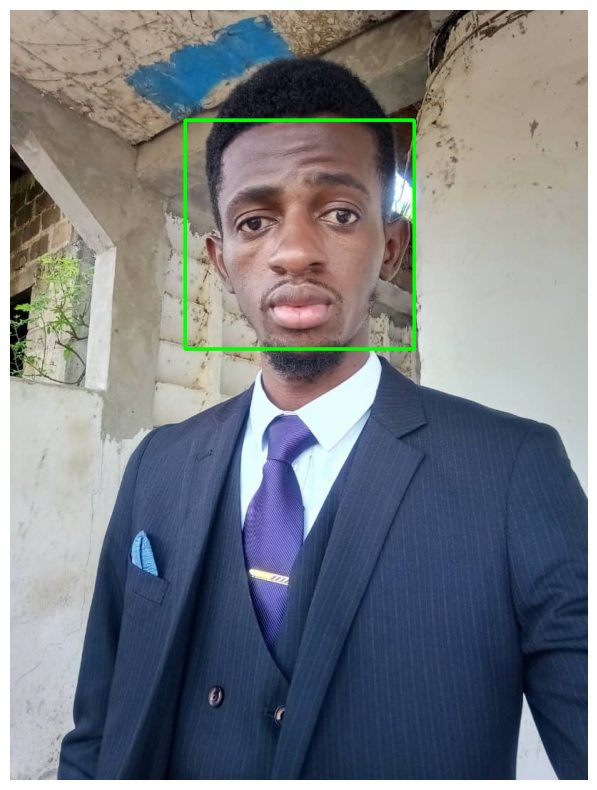

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.imshow(img_rgb)
plt.axis('off')

In [16]:
# real-time face detection

In [17]:
face_classifier = cv.CascadeClassifier(
    cv.data.haarcascades + 'haarcascade_frontalface_default.xml'
    
)

In [18]:
video_capture = cv.VideoCapture(0)

In [20]:
def detect_bounding_box(vid):
    gray_image = cv.cvtColor(vid, cv.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(
        gray_image, 1.1, 5, minSize=(40, 40)
    )

    for(x, y, w, h) in faces:
        cv.rectangle(vid, (x, y), (x+w, y+h), (0, 255, 0), 4)
    return vid

In [ ]:
while True: 
    result, video_frame = video_capture.read() 
    if result is False: 
        break 

    # Détecter les visages (assurez-vous que detect_bounding_box est correctement définie) 
    faces = detect_bounding_box(video_frame) 

    # Afficher la vidéo dans une fenêtre 
    cv.imshow('My Face Detection', video_frame) 
    if cv.waitKey(10) & 0xFF == ord('q'): 
        break 

    # Libérer la capture vidéo et fermer les fenêtres 
    video_capture.release() 
    cv.destroyAllWindows()
    